In [10]:
import numpy as np
from qiskit import Aer, QuantumCircuit, transpile, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [12]:
# size of input bit string
n = 4

# constant oracle algorithm
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘

In [13]:
# balanced oracle algorithm
balanced_oracle = QuantumCircuit(n+1)
b_str = "0010"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

░                      ░      
q_0: ──────░───■──────────────────░──────
           ░   │                  ░      
q_1: ──────░───┼────■─────────────░──────
     ┌───┐ ░   │    │             ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■────────░─┤ X ├
     └───┘ ░   │    │    │        ░ └───┘
q_3: ──────░───┼────┼────┼────■───░──────
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░      
q_4: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘└───┘ ░

In [18]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐      ░                      ░ ┌───┐      ░ ┌─┐         
q_0: ┤ H ├──────░───■──────────────────░─┤ H ├──────░─┤M├─────────
     ├───┤      ░   │                  ░ ├───┤      ░ └╥┘┌─┐      
q_1: ┤ H ├──────░───┼────■─────────────░─┤ H ├──────░──╫─┤M├──────
     ├───┤┌───┐ ░   │    │             ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├─░───┼────┼────■────────░─┤ X ├┤ H ├─░──╫──╫─┤M├───
     ├───┤└───┘ ░   │    │    │        ░ ├───┤└───┘ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────┼────┼────■───░─┤ H ├──────░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘      ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░            ░  ║  ║  ║  ║ 
c_0: ══════════════════════════════════════════════════╩══╬══╬══╬═
                                                          ║  ║  ║ 
c_1: ═════════════════════════════════════════════════════╩══╬══╬═
                                                             ║  ║ 
c_2: ════════════════════════════════════════════════════════╩══╬═
                                                                ║ 
c_3: ═══════════════════════════════════════════════════════════╩═

{'0000': 1024}


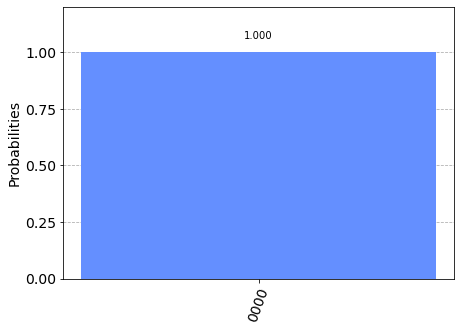

In [8]:
# use local simulator
aer_sim = Aer.get_backend('qasm_simulator')
job = execute(dj_circuit, aer_sim, shots=1024)
results = job.result()
counts = results.get_counts(dj_circuit)
print(counts)
plot_histogram(counts)